# MNIST data challange
### my first attempt for kaggle competitions ( MNIST data can be found here : https://www.kaggle.com/c/digit-recognizer ). this approach scores 0.99285 ( probaby i will update this reposity when i learn more about deep and computer vision so it could score a little bit more).  Solution is written in keras .

In [15]:
# Keras imports
import keras
from keras import models, layers, optimizers
from keras.utils import to_categorical

# other useful libraries
import numpy as np
import scipy as sp
import pandas as pd

# plotting libraries
import bokeh as bkh
import matplotlib.pyplot as plt

# system utilities
import os, sys, shutil

In [16]:
# print what do we have in directory 
os.listdir()

['.ipynb_checkpoints',
 'introduction-to-cnn-keras-0-997-top-6.ipynb',
 'mnist2.ipynb',
 'Mnist_solution.ipynb',
 'sample_submission.csv',
 'submission1.csv',
 'test.csv',
 'train.csv']

In [17]:
# read csv values 
test_data  = pd.read_csv("test.csv")
train_data = pd.read_csv('train.csv') 

## data Preprocessing and data visualization

In [49]:
# represent output data [ labels ] as one hot encoding 
train_Y = to_categorical(train_data["label"])

# remove label from training data ( what left is only pixel values)
train_X = train_data.drop(['label'], axis=1)

# reshape to (28, 28, 1)
train_X = (train_X.values).reshape(train_X.shape[0], 28,28, 1).astype('float32')
test_X  = (test_data.values).reshape(test_data.shape[0], 28 , 28, 1).astype('float32')

print("shape of labels : " , train_Y.shape)
print("shape of input values : ", train_X.shape)
print("shape of test input : ", test_X.shape)

shape of labels :  (42000, 10)
shape of input values :  (42000, 28, 28, 1)
shape of test input :  (28000, 28, 28, 1)


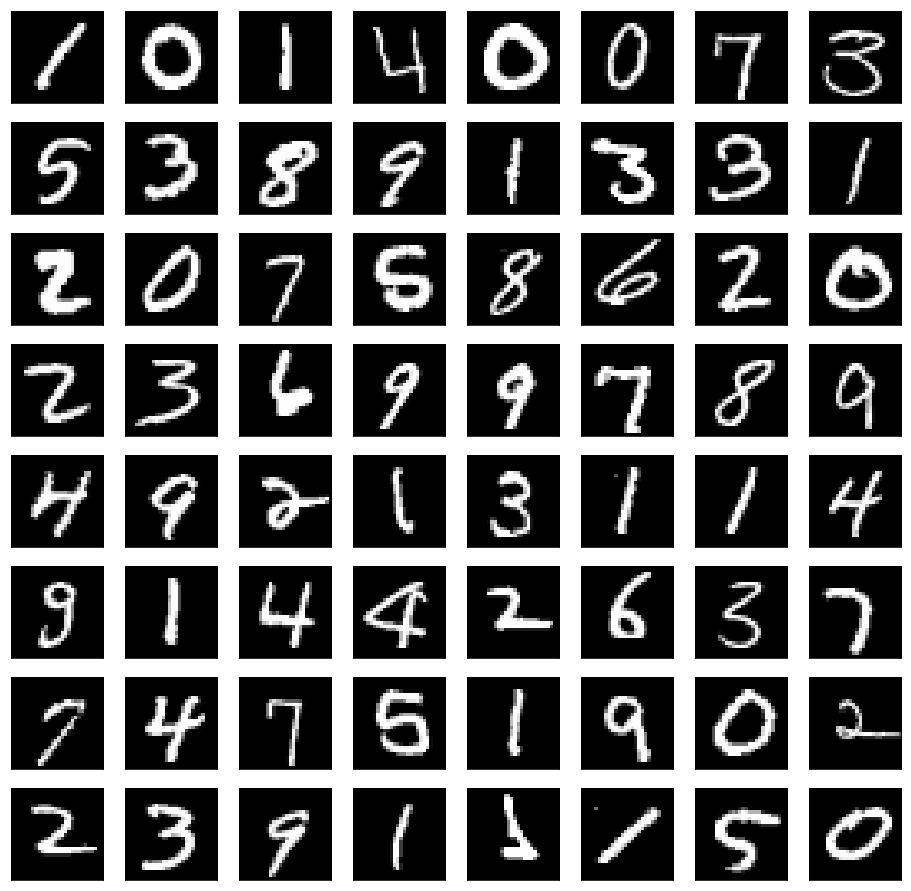

In [45]:
# show few images
fig = plt.figure(figsize=(16,16))
w, h = 8, 8
for i in range( w * h):
    fig.add_subplot(w, h, i + 1)
    plt.imshow(train_X[i].reshape((28,28)), cmap='gray')
    plt.xticks([])
    plt.yticks([])

In [ ]:
# rescale test and train values ( neural network prefers smaller values)
test_X  = test_X / 255.
train_X = train_X / 255.

## Model creation

In [47]:
# create model ( simillar to VGG16, pooling after convolutions, dropout after pooling,)
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=((28,28,1)), activation='relu'))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# compile model 
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizers.RMSprop(), metrics=['accuracy'])

# print summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 64)          0         
__________

## Model fitting 

In [48]:
# fit values into model 
history = model.fit(train_X, train_Y, epochs=25, batch_size=256)

Epoch 1/25
42000/42000 [==============================] - 7s 158us/step - loss: 0.6037 - acc: 0.7992
Epoch 2/25
42000/42000 [==============================] - 6s 145us/step - loss: 0.1219 - acc: 0.9642
Epoch 3/25
42000/42000 [==============================] - 6s 143us/step - loss: 0.0761 - acc: 0.9772
Epoch 4/25
42000/42000 [==============================] - 6s 141us/step - loss: 0.0552 - acc: 0.9833
Epoch 5/25
42000/42000 [==============================] - 6s 142us/step - loss: 0.0455 - acc: 0.9867
Epoch 6/25
42000/42000 [==============================] - 6s 141us/step - loss: 0.0375 - acc: 0.9892
Epoch 7/25
42000/42000 [==============================] - 6s 141us/step - loss: 0.0309 - acc: 0.9905
Epoch 8/25
42000/42000 [==============================] - 6s 143us/step - loss: 0.0283 - acc: 0.9912
Epoch 9/25
42000/42000 [==============================] - 6s 142us/step - loss: 0.0236 - acc: 0.9931
Epoch 10/25
42000/42000 [==============================] - 6s 142us/step - loss: 0.0216 - a

## plot and analyze results 

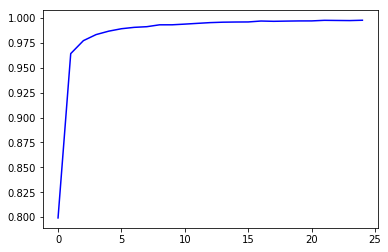

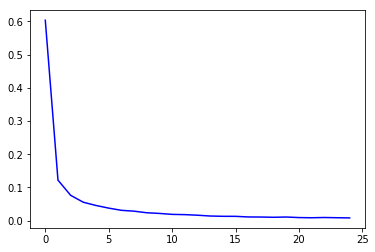

In [58]:
vals = history.history['acc']
loss = history.history['loss']

plt.plot(np.arange(len(vals)), vals, 'b')
plt.show()

plt.plot(np.arange(len(loss)), loss, 'b')
plt.show()

(28000, 10)


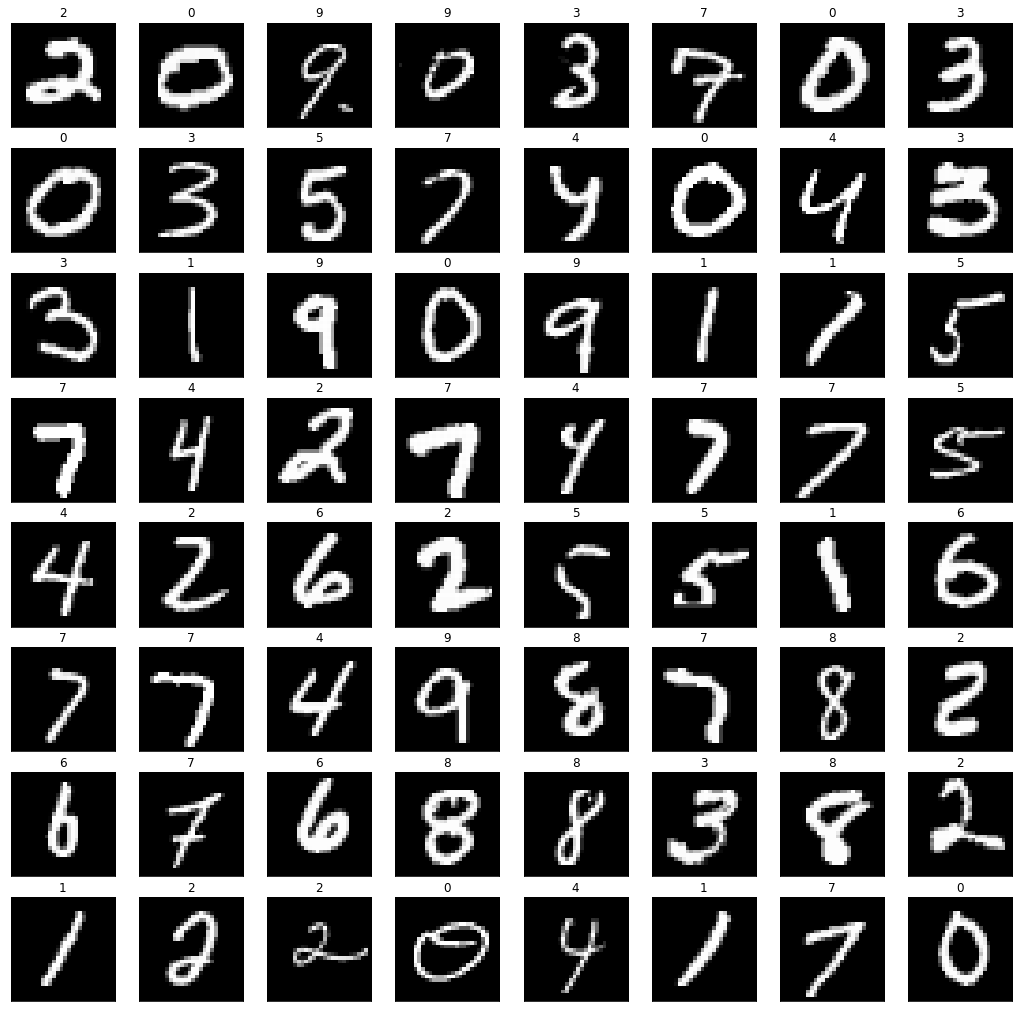

In [61]:
# just sanity check 
print(predicted.shape)

# array with results ( [ imageID, prediction])
output = []
j = 1
for predictions in predicted:
    i, m, prediction = 0., -1., 0.
    for val in predictions:
        if val > m:
            m = val
            prediction = i
        i += 1
    output.append([str(j), str(int(prediction))])
    j += 1

    
# plot the results
fig = plt.figure(figsize=(18,18))
w, h= 8, 8

for i in range(w * h):
    fig.add_subplot(w, h, i + 1)
    plt.imshow(test_X[i].reshape((28,28)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(output[i][1])
    
plt.show()

## Create submission

In [62]:
f = open('submission1.csv', 'w')
f.write('ImageId,Label\n')

for o in output:
    f.write(o[0] + ',' + o[1] + '\n')
f.close()